In [1]:
# Imports
import MDAnalysis as mda
from MDAnalysis.analysis.rdf import InterRDF
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_dir = "../simulation_data/"

psf_file=data_dir + "step3_input.psf"
trj_file=data_dir + "step5_100.dcd"

u = mda.Universe(psf_file,trj_file)

/scratch/zt1/project/energybio/user/jbodosa/data/exec/miniconda3/envs/py3_mda/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [4]:
sel1 = u.select_atoms("name BE")   # central atom
sel2 = u.select_atoms("type O2L")   # neighbor atoms

# Get box volume (Å^3) and density of neighbors
box = u.dimensions[:3]  # box lengths
volume = np.prod(box)
rho = len(sel2) / volume  # density of sel2 atoms

# Divide trajectory into blocks
nframes = len(u.trajectory)
blocks = 40
block_size = nframes // blocks
cn_blocks = []

for i in range(blocks):
    start = i * block_size
    stop = (i+1) * block_size
    rdf = InterRDF(sel1, sel2, range=(0.0, 5.0), nbins=200)
    rdf.run(start=start, stop=stop)

    r = rdf.bins
    g = rdf.rdf

    # Find first minimum (after peak)
    peak_idx = np.argmax(g)
    min_idx = peak_idx + np.argmin(g[peak_idx:])  
    r_min = r[min_idx]

    # Integrate CN up to r_min
    dr = r[1] - r[0]
    integral = np.sum(4 * np.pi * rho * g[:min_idx] * r[:min_idx]**2 * dr)
    cn_blocks.append(integral)

    print(f"Block {i+1}: CN = {integral:.2f} (r_min={r_min:.2f} Å)")

# Final average
cn_mean = np.mean(cn_blocks)
cn_std = np.std(cn_blocks)
print(f"\nCoordination number = {cn_mean:.2f} ± {cn_std:.2f}")


/scratch/zt1/project/energybio/user/jbodosa/data/exec/miniconda3/envs/py3_mda/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/scratch/zt1/project/energybio/user/jbodosa/data/exec/miniconda3/envs/py3_mda/lib/python3.12/site-packages/MDAnalysis/analysis/rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


Block 1: CN = 6.34 (r_min=4.31 Å)
Block 2: CN = 6.23 (r_min=4.34 Å)
Block 3: CN = 6.87 (r_min=4.56 Å)
Block 4: CN = 6.03 (r_min=4.26 Å)
Block 5: CN = 6.25 (r_min=4.39 Å)
Block 6: CN = 5.77 (r_min=4.21 Å)
Block 7: CN = 5.68 (r_min=4.26 Å)
Block 8: CN = 5.66 (r_min=4.21 Å)
Block 9: CN = 5.81 (r_min=4.21 Å)
Block 10: CN = 5.77 (r_min=4.31 Å)
Block 11: CN = 5.55 (r_min=4.24 Å)
Block 12: CN = 5.66 (r_min=4.26 Å)
Block 13: CN = 5.69 (r_min=4.26 Å)
Block 14: CN = 6.94 (r_min=4.84 Å)
Block 15: CN = 6.20 (r_min=4.44 Å)
Block 16: CN = 6.24 (r_min=4.46 Å)
Block 17: CN = 5.87 (r_min=4.26 Å)
Block 18: CN = 5.90 (r_min=4.14 Å)
Block 19: CN = 6.95 (r_min=4.74 Å)
Block 20: CN = 5.89 (r_min=4.14 Å)
Block 21: CN = 6.09 (r_min=4.29 Å)
Block 22: CN = 5.94 (r_min=4.16 Å)
Block 23: CN = 6.02 (r_min=4.24 Å)
Block 24: CN = 6.04 (r_min=4.24 Å)
Block 25: CN = 5.89 (r_min=4.21 Å)
Block 26: CN = 6.02 (r_min=4.21 Å)
Block 27: CN = 6.09 (r_min=4.24 Å)
Block 28: CN = 6.12 (r_min=4.21 Å)
Block 29: CN = 6.15 (r_min=4.

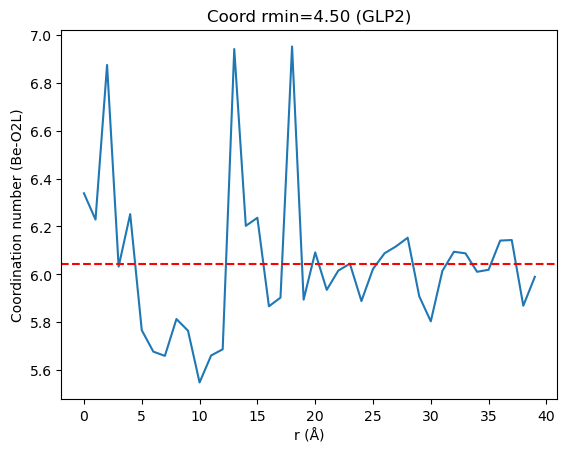

In [5]:
plt.plot(cn_blocks)
plt.axhline(y=cn_mean, color="red", linestyle="dashed")
plt.title("Coord rmin=4.50 (GLP2)")
plt.xlabel("r (Å)")
plt.ylabel("Coordination number (Be-O2L)")
# plt.savefig("coord_eq.png", dpi=300)
plt.show()